<h1 align='center'>Kernel Density Estimator explicado passo a passo<h1/>

Data Science Jr.: Karina Gonçalves Soares

Link de estudo:
* [Kernel Density Estimator explained step by step](https://towardsdatascience.com/kernel-density-estimation-explained-step-by-step-7cc5b5bc4517)

### Introdução
Para ter uma noção da distribuição de dados, desenhamos funções de densidade de probabilidade (PDF). Ficamos satisfeitos quando os dados se ajustam bem a uma função de densidade comum, como normal, Poisson, geométrica, etc. Então, **a abordagem de máxima verossimilhança** pode ser usada para ajustar a função de densidade aos dados.



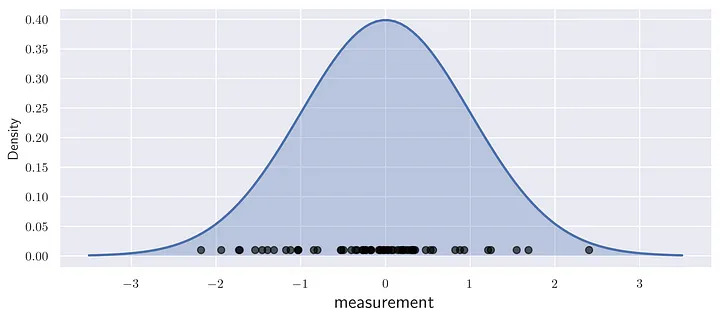

Infelizmente, a distribuição de dados às vezes é muito irregular e não se parece com nenhuma das Funções de Desidade de Probabilidade (PDFs) comuns. Nesses casos, o Estimador de Densidade do Kernel/núcleo (KDE) fornece uma representação racional e visualmente agradável da distribuição de dados.

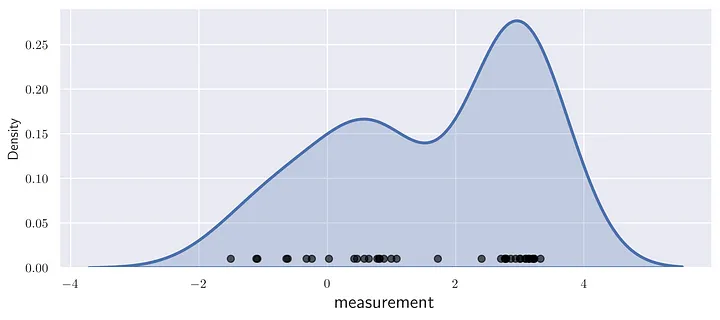

Vamos seguir as etapas de construção do KDE, confiando em sua intuição e não em uma derivação matemática rigorosa.

### A Função do Núcleo
A chave para entender o KDE é pensar nele como **uma função composta de blocos de construção** , semelhante a como diferentes objetos são compostos de peças de Lego. A característica distintiva do KDE é que ele emprega apenas um tipo de tijolo, conhecido como kernel (' um tijolo para governar todos eles '). A principal propriedade deste tijolo é a capacidade de se deslocar e esticar/encolher. **Cada ponto de dados recebe um tijolo e o KDE é a soma de todos os tijolos**.

##### O KDE é uma função composta por um tipo de bloco de construção conhecido como função do kernel.

##### `A função do kernel é avaliada para cada ponto de dados separadamente e esses resultados parciais são somados para formar o KDE`.

O primeiro passo em direção ao KDE é focar em apenas um ponto de dados. O que você faria se fosse solicitado a criar um PDF para um único ponto de dados? Para começar, tome x = 0. A abordagem mais lógica é usar uma PDF que atinge o pico precisamente naquele ponto e decai com a distância dele. A função

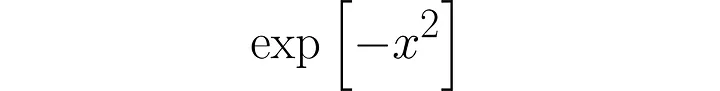

faria o truque.

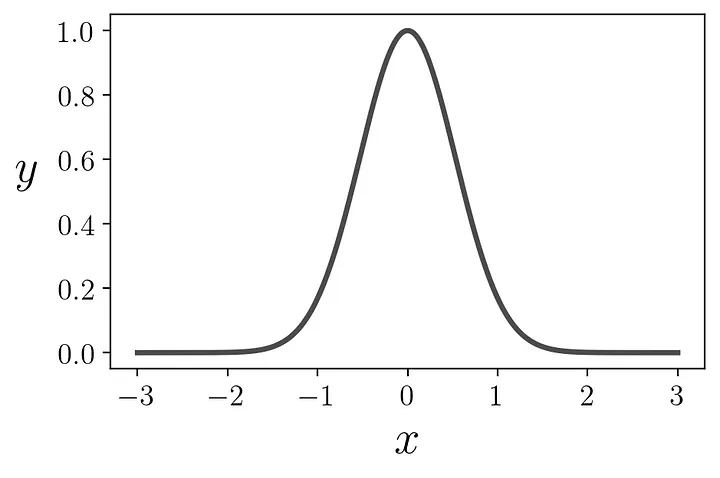

No entanto, como o PDF deve ter uma unidade de área sob a curva, devemos redimensionar o resultado. Portanto, a função deve ser dividida pela raiz quadrada de 2 π e estendida por um fator de √2 ( 3Blue1Brown fornece uma excelente derivação desses fatores):

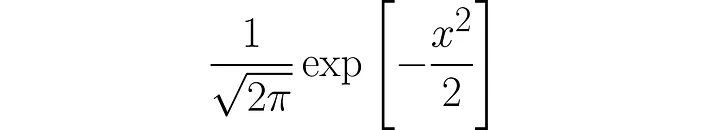

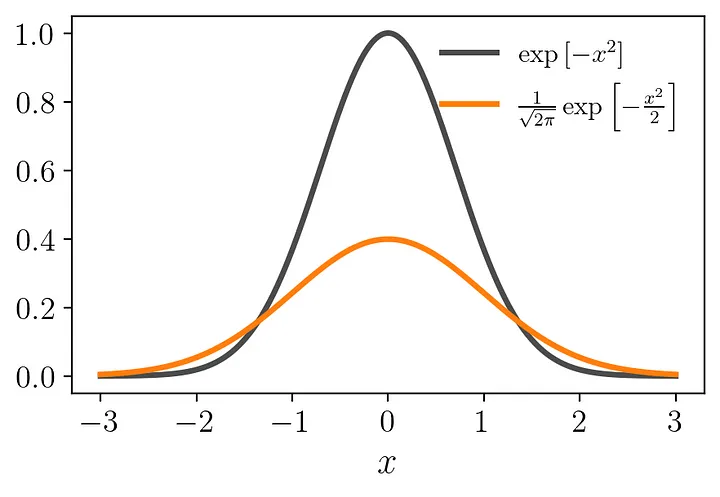

Por fim, chegamos ao nosso tijolo Lego, conhecido como ***função Kernel*** , que é um PDF válido:

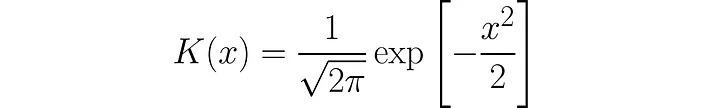

Este Kernel é equivalente a uma distribuição Gaussiana com média zero e variância unitária.

Vamos brincar um pouco com ele. Começaremos aprendendo a deslocá-lo ao longo do eixo ***x*** .

Pegue um único ponto de dados xᵢ - o i -ésimo ponto pertencente ao nosso conjunto de dados X . A mudança pode ser realizada subtraindo o argumento:

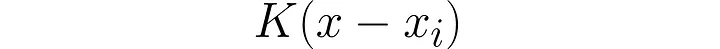

Para tornar a curva mais larga ou mais estreita, podemos apenas lançar uma constante h (a chamada largura de banda do kernel) no argumento. Geralmente é introduzido como um denominador:

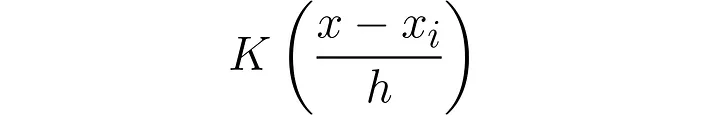

No entanto, a área sob a função kernel é multiplicada por ***h*** como resultado. Portanto, temos que restaurá-lo de volta à unidade de área dividindo por ***h*** :

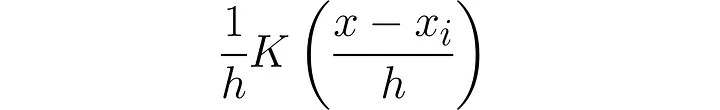

Você pode escolher qualquer valor de ***h*** que desejar. Aqui está um exemplo de como funciona.

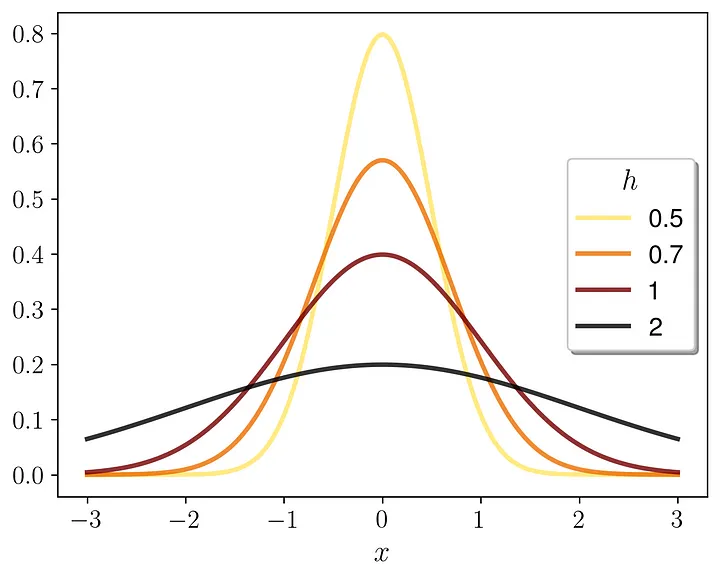

Quanto maior o ***h*** , mais largo o PDF. Quanto menor o ***h*** , mais estreito o PDF.

### Estimador de Densidade do Kernel
Considere alguns dados fictícios para ver como podemos expandir o método para vários pontos.

In [2]:
# conjunto de dados
x = [ 1,33 , 0,3 , 0,97 , 1,1 , 0,1 , 1,4 , 0,4 ] 

# largura de banda
h = 0,3


Para o primeiro ponto de dados, simplesmente usamos:

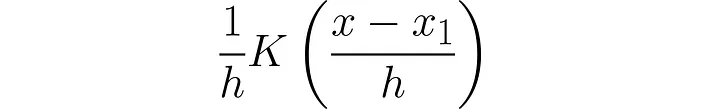

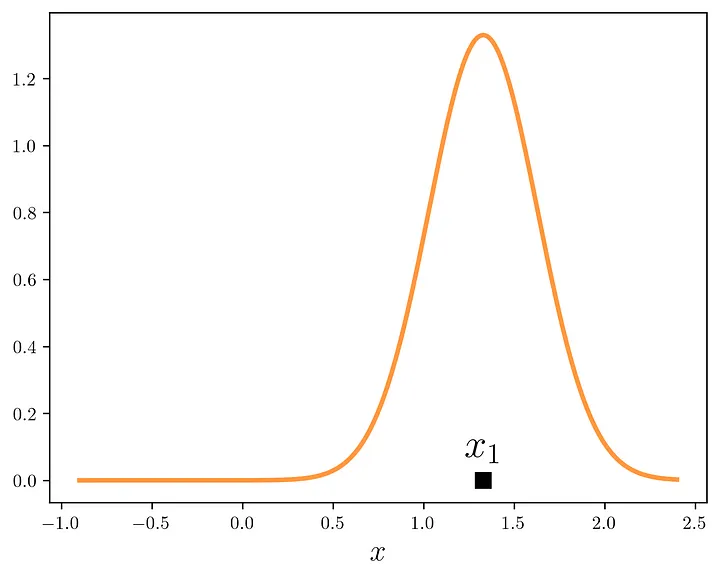



Podemos fazer o mesmo com o segundo ponto de dados:

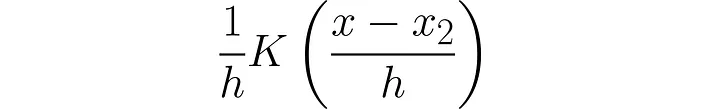


Para obter um único PDF para os dois primeiros pontos, devemos combinar esses dois PDFs separados:

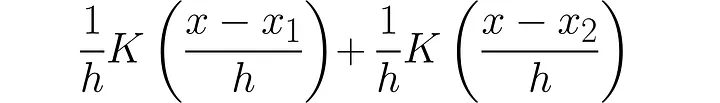

Como adicionamos dois PDFs com área unitária, a área sob a curva passa a ser 2. Para voltar a um, dividimos por dois:

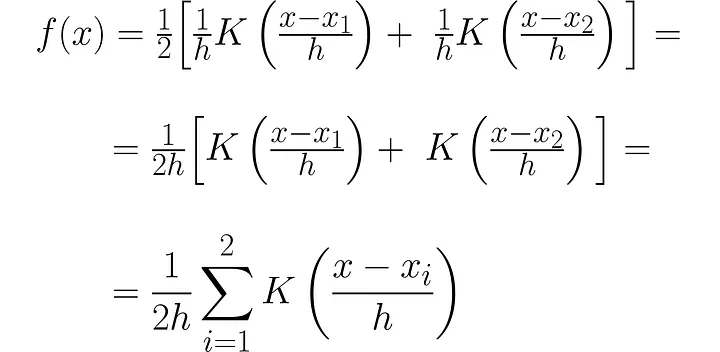


Embora a assinatura completa da função ***f*** possa ser usada para precisão:


usaremos apenas ***f ( x )*** para deixar a notação organizada.

É assim que funciona para dois pontos de dados:

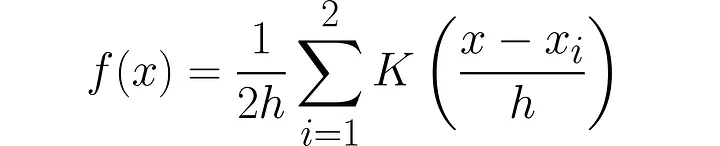

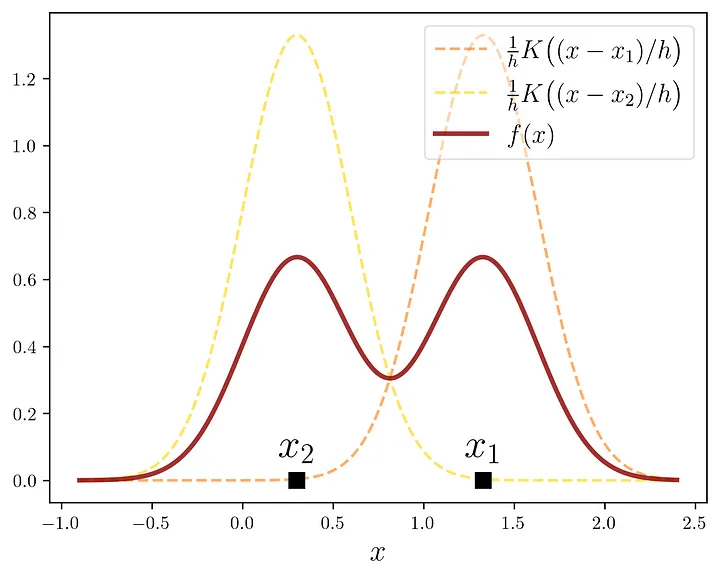


E a etapa final em direção ao KDE é levar em consideração ***n*** pontos de dados

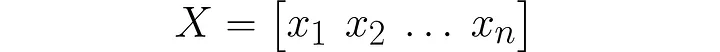

O estimador de densidade do kernel é:

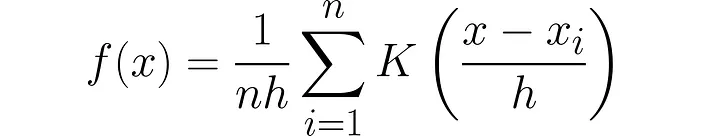


Vamos nos divertir com nosso KDE redescoberto.

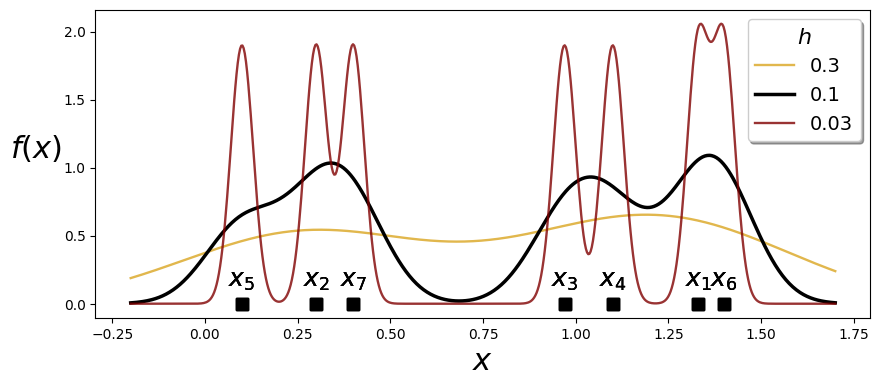

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# a função do kernel
def K(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)

# conjunto de dados fictício
dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# Intervalo de valores x para traçar KDEs
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# valores de largura de banda para experimentação
H = [0.3, 0.1, 0.03]
n_samples = dataset.size

# propriedades de linha para diferentes valores de largura de banda
color_list = ['goldenrod', 'black', 'maroon']
alpha_list = [0.8, 1, 0.8]
width_list = [1.7,2.5,1.7]

plt.figure(figsize=(10,4))
# iterar sobre valores de largura de banda
for h, color, alpha, width in zip(H, color_list, alpha_list, width_list):
    total_sum = 0
    # iterar sobre pontos de dados
    for i, xi in enumerate(dataset):
        total_sum += K((x_range - xi) / h)
        plt.annotate(r'$x_{}$'.format(i+1),
                     xy=[xi, 0.13],
                     horizontalalignment='center',
                     fontsize=18,
                    )
    y_range = total_sum/(h*n_samples)
    plt.plot(x_range, y_range, 
             color=color, alpha=alpha, linewidth=width, 
             label=f'{h}')

    plt.plot(dataset, np.zeros_like(dataset) , 's', 
             markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=20)
plt.legend(fontsize=14, shadow=True, title='$h$', title_fontsize=16)
plt.show()

Aqui usamos o kernel gaussiano, mas encorajo você a tentar outros kernels. Para uma revisão das famílias comuns de funções do kernel, consulte [este artigo](https://www.scirp.org/pdf/ojapps_2013012216494836.pdf) . No entanto, quando o conjunto de dados é grande o suficiente, o tipo de kernel não tem efeito significativo na saída final.

### KDE com bibliotecas Python
A [biblioteca seaborn](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) emprega o KDE para oferecer boas visualizações de distribuições de dados.

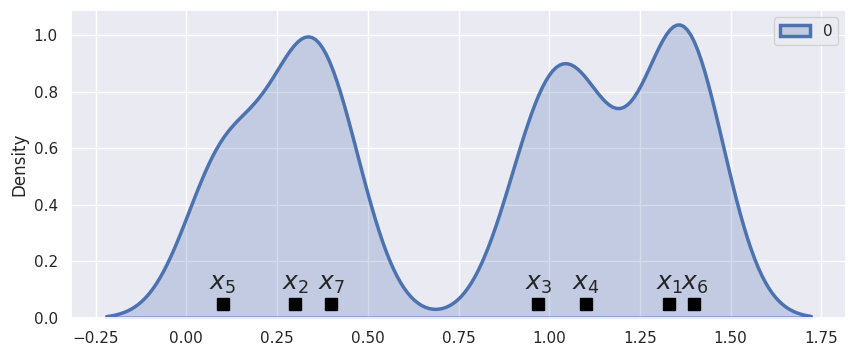

In [13]:
import seaborn as sns
sns.set()

fig, ax = plt.subplots(figsize=(10,4))

sns.kdeplot(ax=ax, data=dataset, 
            bw_adjust=0.3,
            linewidth=2.5, fill=True)

# traçar pontos de dados
ax.plot(dataset, np.zeros_like(dataset) + 0.05, 's', 
        markersize=8, color='black')
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.1],
                 horizontalalignment='center',
                 fontsize=18,
                )
plt.show()

O Scikit Learn oferece a função [KernelDensity](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html) para fazer um trabalho semelhante.

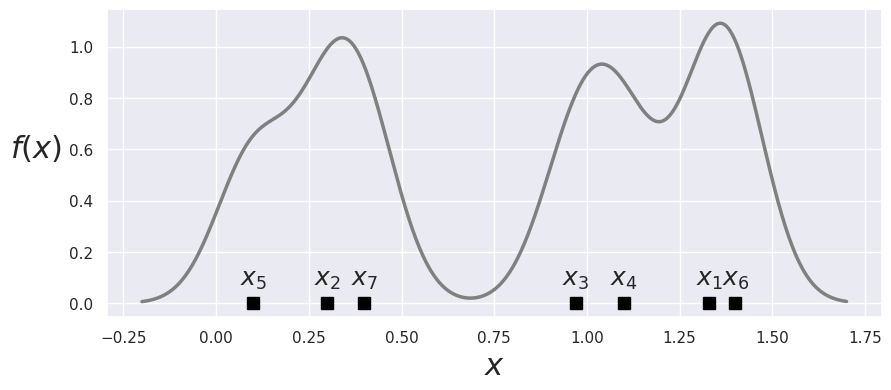

In [10]:
from sklearn.neighbors import KernelDensity

dataset = np.array([1.33, 0.3, 0.97, 1.1, 0.1, 1.4, 0.4])

# KernelDensity requer array 2D
dataset = dataset[:, np.newaxis]

# ajusta o KDE ao conjunto de dados
kde = KernelDensity(kernel='gaussian', bandwidth=0.1).fit(dataset)

# intervalo de valores x para plotar o KDE
x_range = np.linspace(dataset.min()-0.3, dataset.max()+0.3, num=600)

# calcula a probabilidade logarítmica de cada amostra
log_density = kde.score_samples(x_range[:, np.newaxis])

plt.figure(figsize=(10,4))
# coloca rótulos nos pontos de dados
for i, xi in enumerate(dataset):
    plt.annotate(r'$x_{}$'.format(i+1),
                 xy=[xi, 0.07],
                 horizontalalignment='center',
                 fontsize=18)

# desenha a curva do KDE
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# desenha caixas representando pontos de dados
plt.plot(dataset, np.zeros_like(dataset) , 's', 
         markersize=8, color='black')
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

A solução Scikit Learn tem a vantagem de poder ser usada como um modelo generativo para gerar amostras de dados sintéticos.

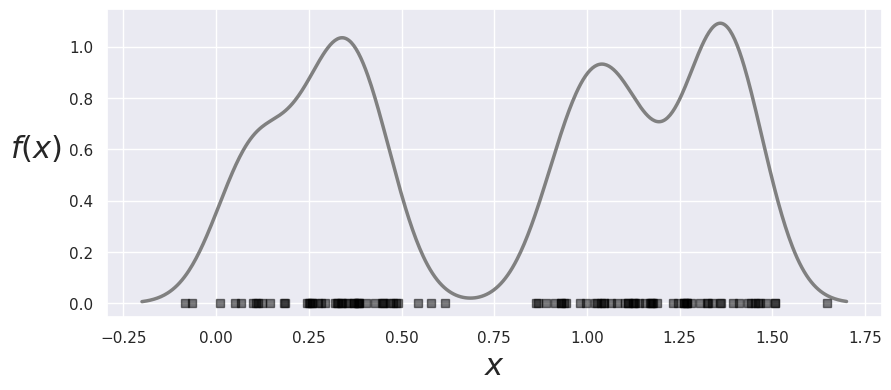

In [12]:
# Gera amostras aleatórias do modelo
synthetic_data = kde.sample(100)

plt.figure(figsize=(10,4))

# desenha a curva do KDE
plt.plot(x_range, np.exp(log_density), 
         color='gray', linewidth=2.5)

# desenha caixas representando pontos de dados
plt.plot(synthetic_data, np.zeros_like(synthetic_data) , 's', 
         markersize=6, color='black', alpha=0.5)
    
plt.xlabel('$x$', fontsize=22)
plt.ylabel('$f(x)$', fontsize=22, rotation='horizontal', labelpad=24)
plt.show()

As características distintivas do KDE:

* esta é uma função composta de um único tipo de bloco de construção denominado `função kernel`;
* este é `um estimador não paramétrico` , o que significa que sua forma funcional é determinada pelos pontos de dados;
* a forma do PDF gerado é fortemente influenciada pelo valor da `largura de banda do kernel` ***h*** ;
* para ajustar ao conjunto de dados, `nenhuma técnica de otimização é necessária` .

A aplicação do KDE a dados multidimensionais é simples. Mas isso é assunto para outra história.

Salvo indicação em contrário, todas as imagens são do autor.

